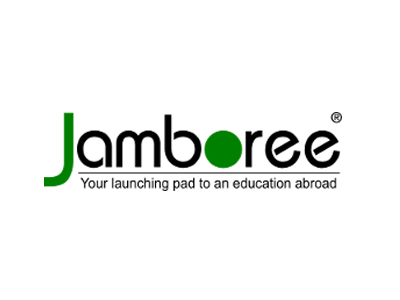

<h1><center> <span style="color:green"> Jamboree Education - Linear Regression </span> </center></h1>

# `Context:`
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# `Problem Statement:`
Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## `1. Importing and reading the Data:`

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")                     #hide warnings

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

from colored import fg

In [4]:
#importing data
data = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/Scaler/8. Jamboree Education/Jamboree_Admission.csv")

## `2. Checking the Structure & Characteristics of the Dataset:`

In [5]:
#check the head 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#check the shape
data.shape

(500, 9)

In [7]:
#check the statistical distribution of numerical features
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
#check the dtype, null valuess, size of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
#check total null values in the data
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
#check if any duplicated rows in the data
data.duplicated().value_counts()

False    500
dtype: int64

# `2. Preprocessing the Data:`

In [11]:
#deep copy of oroginal data
df = data.copy(deep=True)

In [12]:
#concenrt the columns to lowercase
df.columns = df.columns.str.lower()

In [13]:
#drop the serial.no column
df.drop("serial no.",axis = 1, inplace = True)

In [14]:
#removing trailing whitespaces
df.columns = df.columns.str.strip()

In [15]:
#recheck the column name
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

In [16]:
#change the dtype to categorical
df['sop'] = df['sop'].astype("category")
df['lor'] = df['lor'].astype("category")
df['research'] = df['research'].astype("object")
df['university rating'] = df['university rating'].astype("category")

In [17]:
df.describe(include=["category"])

,university rating,sop,lor
count,500,500.0,500.0
unique,5,9.0,9.0
top,3,4.0,3.0
freq,162,89.0,99.0


# `3. Features:`

In [18]:
#creating a feature from chance of admit, by creating bins
bins = [0.0,0.25,0.50,0.75,1.0]
labels = ["0-25","26-50","51-75","75-100"]
df["admit_bin"] = pd.cut(x = df["chance of admit"],bins=bins, labels = labels)
df[["chance of admit","admit_bin"]].head()

,chance of admit,admit_bin
0,0.92,75-100
1,0.76,75-100
2,0.72,51-75
3,0.80,75-100
4,0.65,51-75


# `4. Outliers (if any):`
- Looking at the statistcal description of the data, there is no such outlier which needs to be treated.
- Further checking the size of data, if we remove any information then it may affect the model.
- Each feature here is in a predefined range and the range is a critical feature in this case study
- <span style="color:red"> Hence, we do not remove any data.</span>

# `5. EDA / Visualizing The Data:`

In [19]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit', 'admit_bin'],
      dtype='object')

# `Univariate Analysis:`

Text(0.5, 1.0, 'Distribution of TOEFL Score')

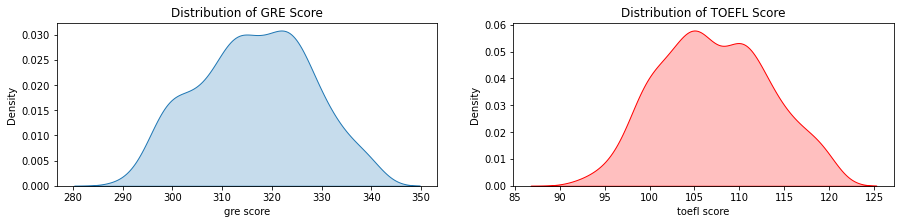

In [20]:
#distplot for gre score and toefl score
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(df["gre score"], shade = True)
plt.title("Distribution of GRE Score")

plt.subplot(1,2,2)
sns.kdeplot(df["toefl score"],shade = True, color = "r")
plt.title("Distribution of TOEFL Score")

<AxesSubplot:xlabel='chance of admit', ylabel='Density'>

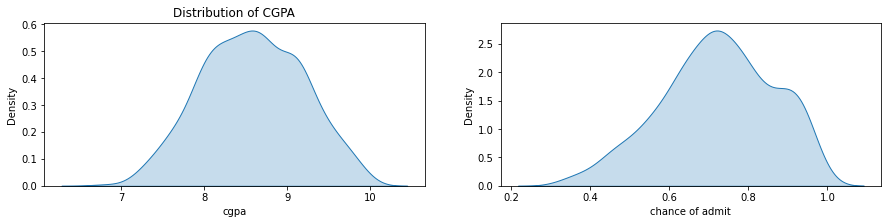

In [24]:
#distplot for CGPA 
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(df["cgpa"], shade = True)
plt.title("Distribution of CGPA")

plt.subplot(1,2,2)
sns.kdeplot(df["chance of admit"], shade = True)

`Inference:` TOEFL, GRE and CGPA are normally distributed. And somehow it seems they are related.

Text(0.5, 1.0, 'Count of SOP')

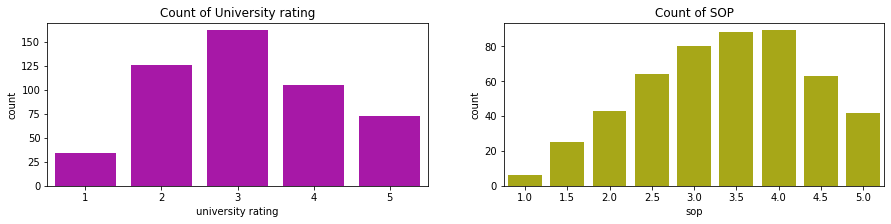

In [316]:
#countplot for University rating,Statement of Purpose(SOP)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df["university rating"], color = "m")
plt.title("Count of University rating")

plt.subplot(1,2,2)
sns.countplot(df["sop"],color = "y")
plt.title("Count of SOP")

Text(0.5, 1.0, 'Count of Research Experience')

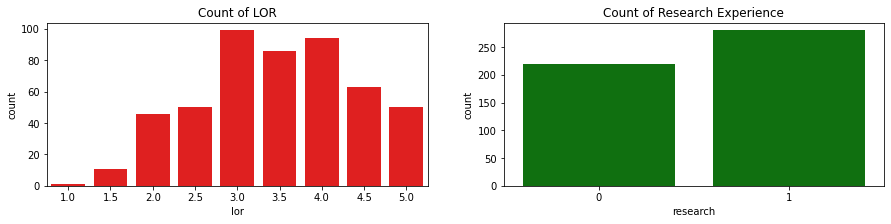

In [317]:
#countplot for LOR and Research Experience
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df["lor"], color = "r")
plt.title("Count of LOR")

plt.subplot(1,2,2)
sns.countplot(df["research"],color = "g")
plt.title("Count of Research Experience")

`Inference:` Most of the students are given University rating 3, SOP and LOR seem to be related, there is hardly any difference in students who have done research papers and who haven't.

# `Bivariate Analysis:`

Text(0.5, 1.0, 'Realtion between TOELF and CGPA')

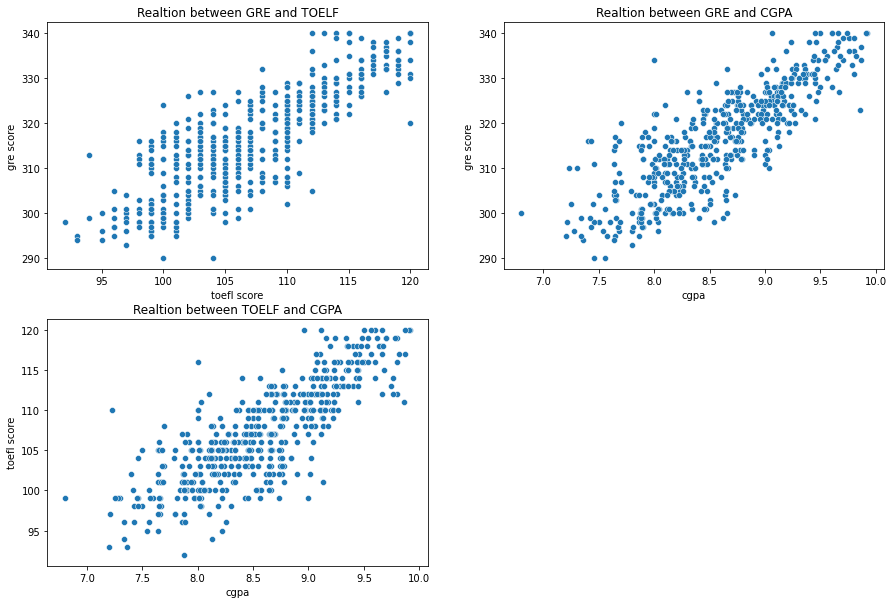

In [318]:
#check relationship bewteen GRE and Toelf using scatterplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data = df, y = "gre score", x = "toefl score")
plt.title("Realtion between GRE and TOELF")

plt.subplot(2,2,2)
sns.scatterplot(data = df, y = "gre score", x = "cgpa")
plt.title("Realtion between GRE and CGPA")

plt.subplot(2,2,3)
sns.scatterplot(data = df, y = "toefl score", x = "cgpa")
plt.title("Realtion between TOELF and CGPA")

`Inference:` It clearly shows that all these variables are related/dependent on each other.

Text(0.5, 1.0, 'Relationship between SOP and LOR')

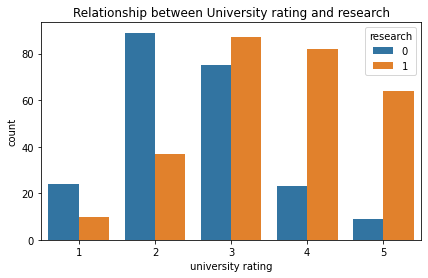

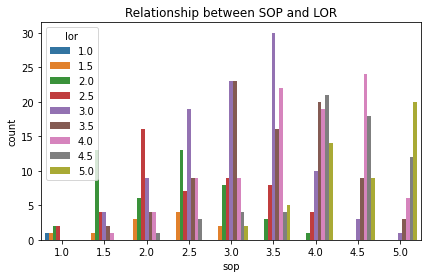

In [319]:
#check relationship between research experience and university rating 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "university rating", hue = "research")
plt.title("Relationship between University rating and research")

#check relationship between research experience and university rating 
plt.figure(figsize=(15,4))
plt.subplot(1,2,2)
sns.countplot(data = df, x = "sop", hue = "lor")
plt.title("Relationship between SOP and LOR")

`Inference:` Unversity rating and Research experince aren't related. SOP and LOR show a good relation.

Text(0.5, 1.0, 'Relationship between CGPA and admit_bin')

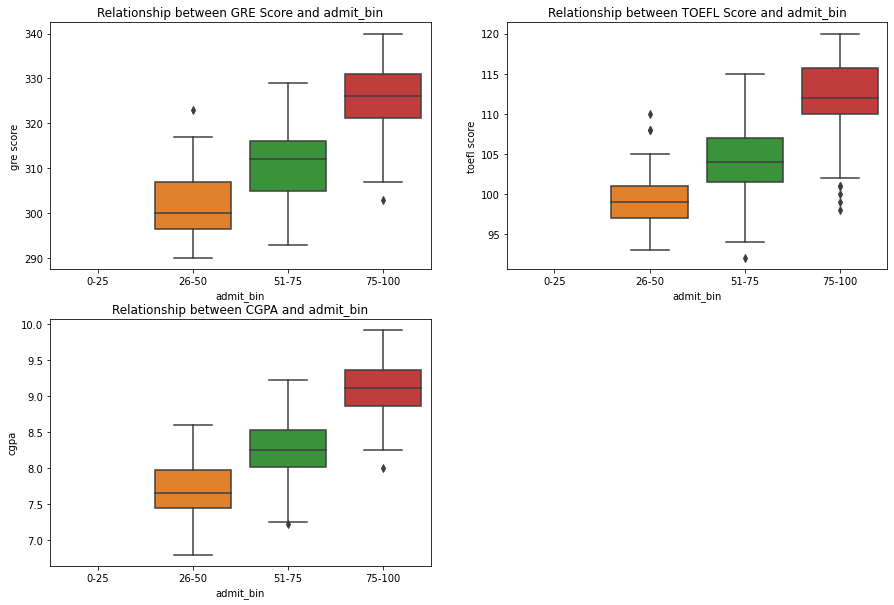

In [320]:
#check num columns relationship with new feature admit_bin
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, y = "gre score", x = "admit_bin")
plt.title("Relationship between GRE Score and admit_bin")

plt.subplot(2,2,2)
sns.boxplot(data = df, y = "toefl score", x = "admit_bin")
plt.title("Relationship between TOEFL Score and admit_bin")

plt.subplot(2,2,3)
sns.boxplot(data = df, y = "cgpa", x = "admit_bin")
plt.title("Relationship between CGPA and admit_bin")

`Inference:` All these three scores show a linear relationship with Chance of admit.

Text(0.5, 1.0, 'Relationship between Research Experience and chance of Admit')

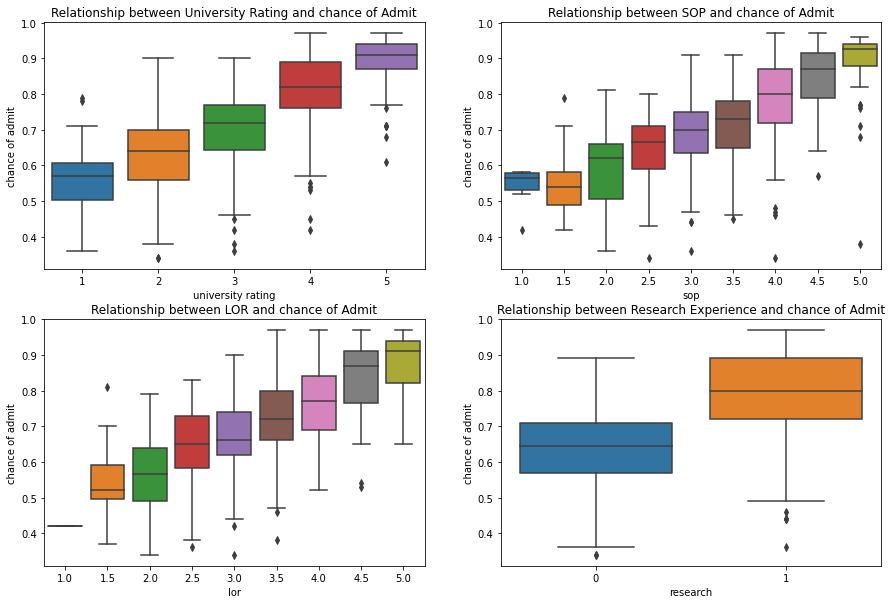

In [321]:
#relationship of categorical cols with chance of admit
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, y = "chance of admit", x = "university rating")
plt.title("Relationship between University Rating and chance of Admit")

plt.subplot(2,2,2)
sns.boxplot(data = df, y = "chance of admit", x = "sop")
plt.title("Relationship between SOP and chance of Admit")

plt.subplot(2,2,3)
sns.boxplot(data = df, y = "chance of admit", x = "lor")
plt.title("Relationship between LOR and chance of Admit")

plt.subplot(2,2,4)
sns.boxplot(data = df, y = "chance of admit", x = "research")
plt.title("Relationship between Research Experience and chance of Admit")

### `Inference:`
1. Median GRE Score to get probability of **75% and above is 327**
2. Median TOEFL Score to get probability of **75% and above is 112**
3. Median CGPA to get probability of **75% and above is 9.25**

# `Multivariate Analysis:`

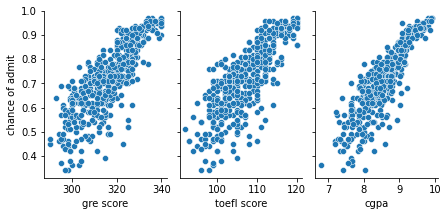

In [322]:
#Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['gre score', 'toefl score', 'cgpa'], y_vars='chance of admit',size=3, aspect=0.7, kind='scatter')

<AxesSubplot:>

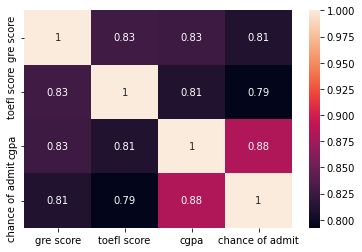

In [323]:
#check the correlation between the features
sns.heatmap(df.corr(),annot = True)

`As we a high (>80%) correlation between GRE, TOEFL and CGPA we will drop two columns i.e GRE and TOEFL.
These multi-colinear columns needs to dropped to avoid noise the model creation.`

In [324]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit', 'admit_bin'],
      dtype='object')

# `6. Data Preparation:`

In [325]:
# split into X and y
X = df.loc[:,['cgpa','university rating', 'sop', 'lor',
       'research']]
y = df["chance of admit"]
X.head()

,cgpa,university rating,sop,lor,research
0,9.65,4,4.5,4.5,1
1,8.87,4,4.0,4.5,1
2,8.00,3,3.0,3.5,1
3,8.67,3,3.5,2.5,1
4,8.21,2,2.0,3.0,0


In [326]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cgpa               500 non-null    float64 
 1   university rating  500 non-null    category
 2   sop                500 non-null    category
 3   lor                500 non-null    category
 4   research           500 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 10.3+ KB


In [327]:
# creating dummy variables for categorical variables
# subset all categorical variables
X_cat = X.select_dtypes(include=["category"])
X_num = X.select_dtypes(include=["int64","float64"])
print(X_cat.head())
print(X_num.head())

  university rating  sop  lor
0                 4  4.5  4.5
1                 4  4.0  4.5
2                 3  3.0  3.5
3                 3  3.5  2.5
4                 2  2.0  3.0
   cgpa
0  9.65
1  8.87
2  8.00
3  8.67
4  8.21


In [328]:
# convert into dummies
X_dummies = pd.get_dummies(X_cat,drop_first = True)
X_dummies.head()

,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,sop_3.5,sop_4.0,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [329]:
# drop categorical variables from X data
X = X.drop(list(X_cat.columns),axis = 1)

In [330]:
# concat dummy variables with X
X = pd.concat([X,X_dummies],axis = 1)
X.head()

,cgpa,research,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,...,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0
0,9.65,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,8.87,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.00,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,8.67,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.21,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [331]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cgpa                 500 non-null    float64
 1   research             500 non-null    object 
 2   university rating_2  500 non-null    uint8  
 3   university rating_3  500 non-null    uint8  
 4   university rating_4  500 non-null    uint8  
 5   university rating_5  500 non-null    uint8  
 6   sop_1.5              500 non-null    uint8  
 7   sop_2.0              500 non-null    uint8  
 8   sop_2.5              500 non-null    uint8  
 9   sop_3.0              500 non-null    uint8  
 10  sop_3.5              500 non-null    uint8  
 11  sop_4.0              500 non-null    uint8  
 12  sop_4.5              500 non-null    uint8  
 13  sop_5.0              500 non-null    uint8  
 14  lor_1.5              500 non-null    uint8  
 15  lor_2.0              500 non-null    uin

In [332]:
X["research"] = X["research"].astype("uint8")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cgpa                 500 non-null    float64
 1   research             500 non-null    uint8  
 2   university rating_2  500 non-null    uint8  
 3   university rating_3  500 non-null    uint8  
 4   university rating_4  500 non-null    uint8  
 5   university rating_5  500 non-null    uint8  
 6   sop_1.5              500 non-null    uint8  
 7   sop_2.0              500 non-null    uint8  
 8   sop_2.5              500 non-null    uint8  
 9   sop_3.0              500 non-null    uint8  
 10  sop_3.5              500 non-null    uint8  
 11  sop_4.0              500 non-null    uint8  
 12  sop_4.5              500 non-null    uint8  
 13  sop_5.0              500 non-null    uint8  
 14  lor_1.5              500 non-null    uint8  
 15  lor_2.0              500 non-null    uin

In [333]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [334]:
#check the same of test and train data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 22)
(150, 22)
(350,)
(150,)


In [335]:
#scaling train data
from sklearn.preprocessing import scale
X_train["cgpa"] = scale(X_train["cgpa"])
X_train.head()

,cgpa,research,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,...,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0
153,0.252228,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
84,1.443820,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
310,0.235206,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
494,-0.258454,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
126,1.222524,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

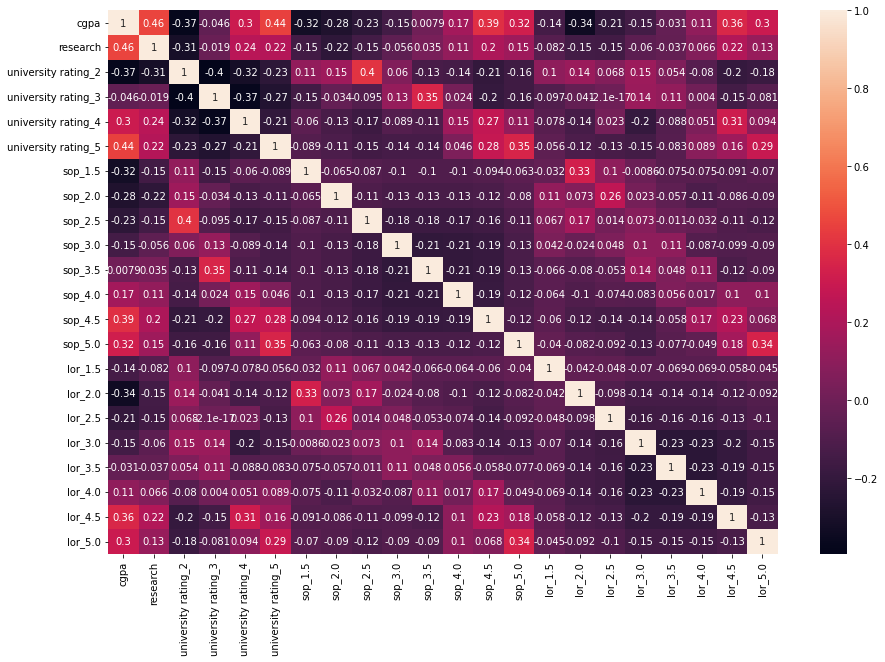

In [336]:
#check the correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot = True)

`Inference:`
- Highest positive correlation can be seen bewteen CGPA and research
- Highest Negative correlation between University rating 2 ansd CGPA
- Also very good Negative correlation between lor_2.0 and CGPA
- Good positive relation between lor_5.0 and sop_5.0

In [337]:
#scaling test data
from sklearn.preprocessing import scale
X_test["cgpa"] = scale(X_test["cgpa"])
X_test.head()

,cgpa,research,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,...,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0
69,1.008012,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29,-1.908762,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
471,-0.669917,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
344,-1.846036,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,-0.811051,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# `7. Building Model using OLS Regression:`

### `MODEL 1`

In [338]:
# Statmodels implementation of Linear regression 
import statsmodels.api as sm
X_train_1 = X_train
X_train_1 = sm.add_constant(X_train_1)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_1 = sm.OLS(y_train, X_train_1).fit()

print(sm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     62.19
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          8.91e-103
Time:                        20:33:25   Log-Likelihood:                 480.25
No. Observations:                 350   AIC:                            -914.5
Df Residuals:                     327   BIC:                            -825.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6301    

In [339]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_1.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,lor_3.0,38.84
19,lor_4.0,38.60
18,lor_3.5,38.32
10,sop_3.5,38.10
11,sop_4.0,37.41
9,sop_3.0,37.24
12,sop_4.5,33.88
20,lor_4.5,29.17
8,sop_2.5,27.88
16,lor_2.5,19.62


`Inference:`We will drop the features who's VIF is highest: `lor_3.0","lor_3.5","lor_4.0`

### `MODEL 2`

In [340]:
#rechecking the p-value of features using statsmodel OLS
X_train_2 = X_train_1.drop(["lor_3.0","lor_3.5","lor_4.0"],axis =1)

import statsmodels.api as sm
X_train_2 = sm.add_constant(X_train_2)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_2 = sm.OLS(y_train, X_train_2).fit()

print(sm_2.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     72.02
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          4.85e-105
Time:                        20:33:25   Log-Likelihood:                 478.99
No. Observations:                 350   AIC:                            -918.0
Df Residuals:                     330   BIC:                            -840.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6405    

In [341]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_2.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,university rating_3,8.56
4,university rating_4,7.69
2,university rating_2,6.16
11,sop_4.0,5.73
5,university rating_5,5.67
12,sop_4.5,5.54
10,sop_3.5,5.50
9,sop_3.0,5.27
8,sop_2.5,4.42
13,sop_5.0,3.51


`Infernce:` We drop feature `"university rating_3","university rating_4"`as the VIF is high

### `MODEL 3`


In [342]:
#rechecking the p-value of features using statsmodel OLS
X_train_3 = X_train_2.drop(["university rating_3","university rating_4"],axis =1)

import statsmodels.api as sm
X_train_3 = sm.add_constant(X_train_3)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_3 = sm.OLS(y_train, X_train_3).fit()

print(sm_3.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     80.32
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          1.74e-106
Time:                        20:33:25   Log-Likelihood:                 477.85
No. Observations:                 350   AIC:                            -919.7
Df Residuals:                     332   BIC:                            -850.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6380    

In [343]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_3.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,research,3.04
0,cgpa,2.40
2,university rating_2,1.95
6,sop_2.5,1.94
10,sop_4.5,1.91
11,sop_5.0,1.82
9,sop_4.0,1.67
3,university rating_5,1.65
7,sop_3.0,1.62
15,lor_4.5,1.56


`Infernce:` We drop feature `university rating_2` as the p-value is too high

### `MODEL 4`

In [344]:
#rechecking the p-value of features using statsmodel OLS
X_train_4 = X_train_3.drop(["university rating_2"],axis =1)

import statsmodels.api as sm
X_train_4 = sm.add_constant(X_train_4)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_4 = sm.OLS(y_train, X_train_4).fit()

print(sm_4.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     85.12
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          3.92e-107
Time:                        20:33:25   Log-Likelihood:                 477.05
No. Observations:                 350   AIC:                            -920.1
Df Residuals:                     333   BIC:                            -854.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6382    

In [345]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_4.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,research,2.98
0,cgpa,2.39
9,sop_4.5,1.85
10,sop_5.0,1.78
2,university rating_5,1.65
8,sop_4.0,1.58
14,lor_4.5,1.55
15,lor_5.0,1.49
3,sop_1.5,1.46
6,sop_3.0,1.42


`Infernce:` We drop feature `sop_5.0`as the p-value is high

### `MODEL 5`

In [346]:
#rechecking the p-value of features using statsmodel OLS
X_train_5 = X_train_4.drop(["sop_5.0"],axis =1)

import statsmodels.api as sm
X_train_5 = sm.add_constant(X_train_5)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_5 = sm.OLS(y_train, X_train_5).fit()

print(sm_5.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     90.41
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          1.06e-107
Time:                        20:33:25   Log-Likelihood:                 476.03
No. Observations:                 350   AIC:                            -920.1
Df Residuals:                     334   BIC:                            -858.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6878    

In [347]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_5.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,research,2.75
0,cgpa,2.38
9,sop_4.5,1.52
2,university rating_5,1.51
3,sop_1.5,1.46
13,lor_4.5,1.44
11,lor_2.0,1.42
4,sop_2.0,1.40
6,sop_3.0,1.38
8,sop_4.0,1.38


`Infernce:` We drop feature `sop_4.5","sop_1.5","lor_2.0","lor_4.5`as the p-value is high

### `MODEL 6`

In [348]:
#rechecking the p-value of features using statsmodel OLS
X_train_6 = X_train_5.drop(["sop_4.5","sop_1.5","lor_2.0","lor_4.5" ],axis =1)

import statsmodels.api as sm
X_train_6 = sm.add_constant(X_train_6)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_6 = sm.OLS(y_train, X_train_6).fit()

print(sm_6.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          2.94e-110
Time:                        20:33:26   Log-Likelihood:                 472.28
No. Observations:                 350   AIC:                            -920.6
Df Residuals:                     338   BIC:                            -874.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6967    

In [349]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_6.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,research,2.19
0,cgpa,1.71
2,university rating_5,1.45
3,sop_2.0,1.28
5,sop_3.0,1.28
7,sop_4.0,1.25
6,sop_3.5,1.24
10,lor_5.0,1.23
4,sop_2.5,1.22
9,lor_2.5,1.22


`Infernce:` We drop feature `sop_2.0","sop_3.0","sop_4.0","sop_3.5`as the p-value is high

### `MODEL 7`

In [350]:
#rechecking the p-value of features using statsmodel OLS
X_train_7 = X_train_6.drop(["sop_2.0","sop_3.0","sop_4.0","sop_3.5"],axis =1)

import statsmodels.api as sm
X_train_7 = sm.add_constant(X_train_7)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_7= sm.OLS(y_train, X_train_7).fit()

print(sm_7.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          2.99e-114
Time:                        20:33:26   Log-Likelihood:                 471.17
No. Observations:                 350   AIC:                            -926.3
Df Residuals:                     342   BIC:                            -895.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6919    

In [351]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_7.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cgpa,1.47
2,university rating_5,1.43
1,research,1.40
6,lor_5.0,1.22
3,sop_2.5,1.13
5,lor_2.5,1.10
4,lor_1.5,1.04


`Inference:` We drop feature `sop_2.5","lor_2.5`as the p-value is high

## `MODEL 8`

In [352]:
#rechecking the p-value of features using statsmodel OLS
X_train_8 = X_train_7.drop(["sop_2.5","lor_2.5"],axis =1)

import statsmodels.api as sm
X_train_8 = sm.add_constant(X_train_8)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_8= sm.OLS(y_train, X_train_8).fit()

print(sm_8.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     269.2
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          1.52e-116
Time:                        20:33:26   Log-Likelihood:                 470.85
No. Observations:                 350   AIC:                            -929.7
Df Residuals:                     344   BIC:                            -906.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6937    

In [353]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_8.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,university rating_5,1.43
0,cgpa,1.29
1,research,1.28
4,lor_5.0,1.22
3,lor_1.5,1.03


`Inference:` We drop feature `lor_1.5`as the p-value is high

## `MODEL 9`

In [354]:
#rechecking the p-value of features using statsmodel OLS
X_train_9 = X_train_8.drop(["lor_1.5"],axis =1)

import statsmodels.api as sm
X_train_9 = sm.add_constant(X_train_9)  #Statmodels default is without intercept, to add intercept we need to add constant 
sm_9= sm.OLS(y_train, X_train_9).fit()

print(sm_9.summary())

                            OLS Regression Results                            
Dep. Variable:        chance of admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          2.26e-117
Time:                        20:33:26   Log-Likelihood:                 469.76
No. Observations:                 350   AIC:                            -929.5
Df Residuals:                     345   BIC:                            -910.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6929    

In [355]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X_train_9.drop(["const"],axis = 1)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,university rating_5,1.43
1,research,1.27
0,cgpa,1.26
3,lor_5.0,1.22


`Inference:` Finally we have the best fit features as mentioned above ans these feature have p-value < 0.05

### `Residual Analysis of the Train Data`

` a) Normality of Errors:`

To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [356]:
#get y_pred for your train data
y_train_pred = sm_9.predict(X_train_9)

In [357]:
#check the train error
train_error = y_train - y_train_pred
print("Train Erorr Mean : " + str(np.round(train_error.mean(),4)))

Train Erorr Mean : 0.0


<AxesSubplot:ylabel='Density'>

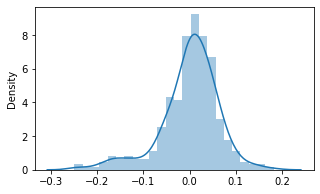

In [358]:
#check the distribution of error
fig = plt.figure(figsize = (5,3))
sns.distplot(train_error)

`b) Test for Heteroscedasticity:`

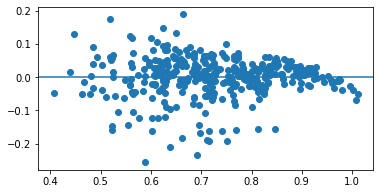

In [359]:
#plotting error to check Homoscrdasticity
resid = sm_6.resid
fig = plt.figure(figsize = (6,3))
plt.scatter(y_train_pred, resid)    
plt.axhline(0, 0,8)
plt.show()

We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

### `Making Predictions Using the Final Model`

In [360]:
#check the X test data
X_test.head()

,cgpa,research,university rating_2,university rating_3,university rating_4,university rating_5,sop_1.5,sop_2.0,sop_2.5,sop_3.0,...,sop_4.5,sop_5.0,lor_1.5,lor_2.0,lor_2.5,lor_3.0,lor_3.5,lor_4.0,lor_4.5,lor_5.0
69,1.008012,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
29,-1.908762,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
471,-0.669917,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
344,-1.846036,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
54,-0.811051,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [361]:
#choosing the columns from final model 9 of train data and not taking the constant value
col = X_train_9.columns[1:]
X_test_9 = X_test[col]

#adding constant variable
X_test_9 = sm.add_constant(X_test_9)
X_test_9.shape

(150, 5)

In [362]:
#check test data
X_test_9.head()

,const,cgpa,research,university rating_5,lor_5.0
69,1.0,1.008012,1,0,0
29,1.0,-1.908762,0,0,0
471,1.0,-0.669917,0,0,0
344,1.0,-1.846036,0,0,0
54,1.0,-0.811051,0,0,0


In [363]:
# making predictions usingthe final model
y_pred_test = sm_9.predict(X_test_9)

In [364]:
#Evalution for Train Data
r2 = r2_score(y_train,y_train_pred)
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt( mean_squared_error(y_train,y_train_pred))
mape = mean_absolute_percentage_error(y_train,y_train_pred)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_train_OLS = pd.DataFrame(perf_data,columns= ["Scores_OLS_train"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_train_OLS

,Scores_OLS_train
R-Squared,0.795176
Mean Absolute Error,0.045232
Mean Square Error,0.003997
Root Mean Square Error,0.063221
Mean Absolute Percentage Error,0.072195


In [365]:
#Evalution for Train Data
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt( mean_squared_error(y_test,y_pred_test))
mape = mean_absolute_percentage_error(y_test,y_pred_test)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_test_OLS = pd.DataFrame(perf_data,columns= ["Scores_OLS_test"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_test_OLS

,Scores_OLS_test
R-Squared,0.810457
Mean Absolute Error,0.046892
Mean Square Error,0.003930
Root Mean Square Error,0.062689
Mean Absolute Percentage Error,0.075344


## `Validating Assumptions:`

### `Assumption 1: Linearity of Variables:`

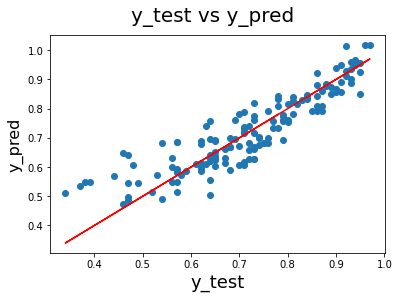

In [366]:
#plot the variables
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.plot(y_test, y_test, color="red")

`Inference:` It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity.

### `Assumption 2: Errors are Normally Distributed:`

In [367]:
#check the test error distribution
test_error = y_test - y_pred_test
print("Test Erorr Mean : " + str(np.round(test_error.mean(),4)))

Test Erorr Mean : -0.0033


<AxesSubplot:ylabel='Density'>

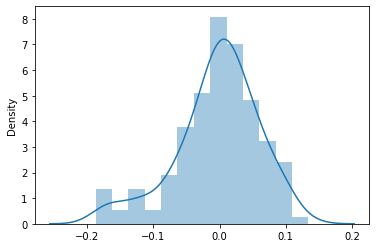

In [368]:
#using distplot to check the distribution of Errors
sns.distplot(test_error)

`Inference:` As we can see the distribution is **Normal**, so assumption of Linear Regression is satisfied.

### `Assumption 3: No Multicollinearity among the Features:`

We check the multicolinearity by checking the VIF score of each feature. If the VIF is >5 then there is some dependency of that varaible. And **1 < VIF > 5** means these are the decent features to be considered.

In [369]:
#taking the final vif from the above OLS model.
print(vif)

              Features   VIF
2  university rating_5  1.43
1             research  1.27
0                 cgpa  1.26
3              lor_5.0  1.22


`Inference:` All the VIF are below 3 hence these features are independent. **No Multicolinearity** in the above features.

### `Assumption 4: Test of Homoscedasticity:`

Homoscedactcity means the residuals/errors are **eqaul across the Regression Line**. Which means the errors are distributed Normally and there is no multicolinearity among the Features.

eval_env: 1


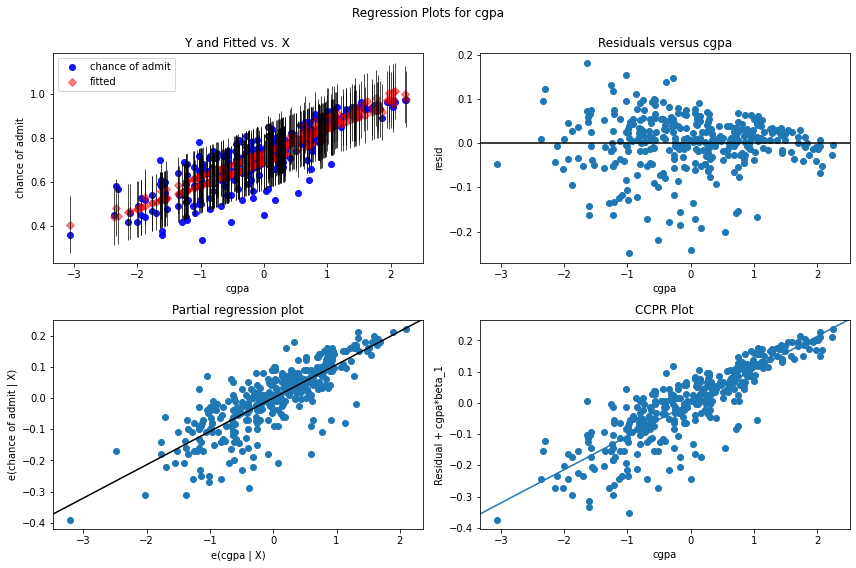

In [370]:
#using statsmodel for ploting the numerical feature and errors.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(sm_9, 'cgpa', fig=fig)

`Inference:` 
- Error are equal across the Regression Line, this assumption is satisfied
- The errors are distributed Normally and there is no multicolinearity among the Features.

### `Conclusion of OLS Model:`

`Following are the variables that are significant in predicting the probabilty of getting admission in IVY League Colleges:`
1. Research
2. CGPA
3. LOR 
4. University Rating 5
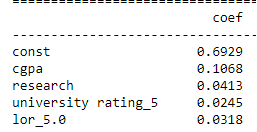

We can see that the equation of our best fitted line is:
### <span style="color:red"> *Probability of Admission = 0.107 x **cgpa**  + 0.0417 x **research** + 0.0245 x **university raing_5** + 0.0318 x **lor_0.5** +0.6954* </span>

# `8. Model building using Ridge Regression:` 

In [371]:
#get the X train data
X_train_9.drop(["const"],axis=1,inplace = True)

In [372]:
#check the data
X_train_9.head()

,cgpa,research,university rating_5,lor_5.0
153,0.252228,0,0,0
84,1.443820,1,1,0
310,0.235206,1,0,0
494,-0.258454,1,0,0
126,1.222524,1,0,0


In [373]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_9, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [374]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005861,0.008854,0.002895,0.001778,0.0001,{'alpha': 0.0001},-0.045606,-0.043733,-0.043161,-0.049337,...,-0.045685,0.002206,23,-0.045214,-0.045734,-0.045923,-0.044038,-0.044971,-0.045176,0.000665
1,0.003234,0.004275,0.002756,0.003546,0.001,{'alpha': 0.001},-0.045606,-0.043733,-0.043161,-0.049337,...,-0.045685,0.002206,22,-0.045214,-0.045734,-0.045923,-0.044038,-0.044971,-0.045176,0.000665
2,0.003197,0.003915,0.002142,0.003302,0.01,{'alpha': 0.01},-0.045608,-0.043733,-0.043160,-0.049336,...,-0.045684,0.002206,21,-0.045214,-0.045734,-0.045923,-0.044038,-0.044971,-0.045176,0.000665
3,0.003100,0.002771,0.000000,0.000000,0.05,{'alpha': 0.05},-0.045615,-0.043731,-0.043156,-0.049335,...,-0.045684,0.002206,20,-0.045213,-0.045734,-0.045923,-0.044037,-0.044971,-0.045176,0.000665
4,0.002096,0.003085,0.001207,0.001855,0.1,{'alpha': 0.1},-0.045624,-0.043728,-0.043152,-0.049332,...,-0.045683,0.002207,19,-0.045212,-0.045733,-0.045923,-0.044037,-0.044971,-0.045175,0.000665


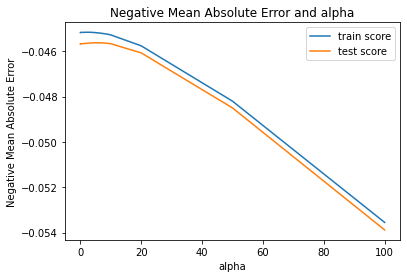

In [375]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

`Inference:`The alpha value where the model seems optimal is 10. And our model is `OVERFITTING`, which there is some multicolinearity in the final features.

In [376]:
#training the model using alpha value as 10
alpha = 10
ridge = Ridge(alpha=alpha)

model = ridge.fit(X_train_9, y_train)
ridge.coef_

array([0.10502143, 0.03901611, 0.02335396, 0.02550628])

In [377]:
#check the accuracy / goodness of fit of your model
X_test_9.drop(["const"],axis=1,inplace = True)
score = ridge.score(X_test_9, y_test)
print("Ridge Regression Model Score : " , np.round(score,4))

Ridge Regression Model Score :  0.8122


In [378]:
#calculate the y_pred from the model you created
y_pred_train = ridge.predict(X_train_9)
y_pred_test = ridge.predict(X_test_9)

In [379]:
#check the mean of the error 
error_train = y_train - y_pred_train
error_test = y_test - y_pred_test
print("Train Erorr :" + str(np.round(error_train.mean(),4)))
print("Test Erorr :" + str(np.round(error_test.mean(),4)))

Train Erorr :-0.0
Test Erorr :-0.0031


In [380]:
print("Train R2 Score: ",np.round(r2_score(y_train,y_pred_train),2))
print("Test R2 Score: ",np.round(r2_score(y_test,y_pred_test),2)) 

Train R2 Score:  0.79
Test R2 Score:  0.81


In [381]:
#Evaluation for Train Data
r2 = r2_score(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
mse = mean_squared_error(y_train,y_pred_train)
rmse = np.sqrt( mean_squared_error(y_train,y_pred_train))
mape = mean_absolute_percentage_error(y_train,y_pred_train)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_train_Ridge = pd.DataFrame(perf_data,columns= ["Scores_Ridge_train"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_train_Ridge

,Scores_Ridge_train
R-Squared,0.794500
Mean Absolute Error,0.045253
Mean Square Error,0.004010
Root Mean Square Error,0.063325
Mean Absolute Percentage Error,0.072414


In [382]:
#Evaluation for test Data
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt( mean_squared_error(y_test,y_pred_test))
mape = mean_absolute_percentage_error(y_test,y_pred_test)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_test_Ridge = pd.DataFrame(perf_data,columns= ["Scores_Ridge_test"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_test_Ridge

,Scores_Ridge_test
R-Squared,0.812234
Mean Absolute Error,0.045979
Mean Square Error,0.003893
Root Mean Square Error,0.062394
Mean Absolute Percentage Error,0.074547


### `Checking the Assumptions of LR for Ridge Model:`

### `Assumption 1: Linearity of Variables:`

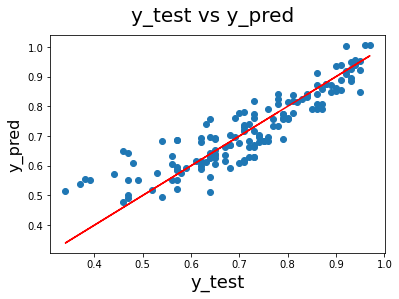

In [383]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.plot(y_test, y_test, color="red")

`Inference:` It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity.

### `Assumption 2: Errors are Normally Distributed:`

<AxesSubplot:xlabel='chance of admit', ylabel='Density'>

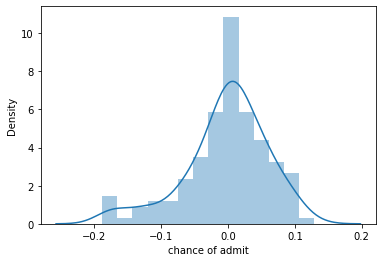

In [384]:
#using distplot to check the distribution of Errors
sns.distplot(error_test)

`Inference:` As we can see the distribution is **Normal**, so assumption of Linear Regression is satisfied.

### `Assumption 3: No Multicollinearity among the Features:`

We check the multicolinearity by checking the VIF score of each feature. If the VIF is >5 then there is some dependency of that varaible. And **1 < VIF > 5** means these are the decent features to be considered.

In [385]:
print(vif)

              Features   VIF
2  university rating_5  1.43
1             research  1.27
0                 cgpa  1.26
3              lor_5.0  1.22


`Inference:` All the VIF are below 3 hence these features are independent. **No Multicolinearity** in the above features.

Homoscedactcity means the residuals/errors are **eqaul across the Regression Line**. Which means the errors are distributed Normally and there is no multicolinearity among the Features.

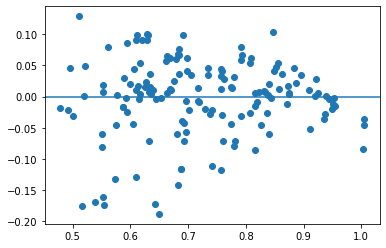

In [386]:
plt.scatter(y_pred_test, error_test)
plt.axhline(0, 0,8)

### `Assumption 4: Test of Homoscedasticity:`

`Inference:` We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

### `Conclusion of Ridge Model:`

`Following are the variables that are significant in predicting the probabilty of getting admission in IVY League Colleges:`
1. Research
2. CGPA
3. LOR 
4. University Rating 5

We can see that the equation of our best fitted line is:
### <span style="color:red"> *Probability of Admission = 0.105 x **cgpa**  + 0.039 x **research** + 0.023 x **university raing_5** + 0.026 x **lor_0.5** +0.6954* </span>

#  `9. Model building using Lasso Regression:` 

In [387]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_9, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [388]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009198,0.004143,0.001332,0.000873,0.0001,{'alpha': 0.0001},-0.045736,-0.043676,-0.043094,-0.049298,...,-0.045664,0.002213,2,-0.045170,-0.045720,-0.045909,-0.044015,-0.044955,-0.045154,0.000667
1,0.005949,0.003717,0.004607,0.002259,0.001,{'alpha': 0.001},-0.046904,-0.043182,-0.042682,-0.048974,...,-0.045555,0.002351,1,-0.045068,-0.045761,-0.045836,-0.043991,-0.044927,-0.045117,0.000669
2,0.005077,0.002913,0.003151,0.000974,0.01,{'alpha': 0.01},-0.055208,-0.044794,-0.043837,-0.054147,...,-0.049619,0.004662,3,-0.049457,-0.049737,-0.050597,-0.047994,-0.049124,-0.049382,0.000849
3,0.005490,0.002935,0.001771,0.001115,0.05,{'alpha': 0.05},-0.081199,-0.057680,-0.058259,-0.070020,...,-0.066435,0.008676,4,-0.065810,-0.065273,-0.067414,-0.065432,-0.066073,-0.066000,0.000761
4,0.005328,0.002725,0.001894,0.001581,0.1,{'alpha': 0.1},-0.124999,-0.079552,-0.088069,-0.100009,...,-0.097860,0.015320,5,-0.096267,-0.095256,-0.097765,-0.097539,-0.098555,-0.097076,0.001170


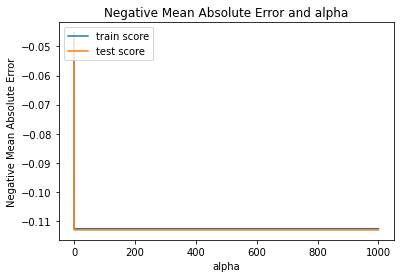

In [389]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

`Inference:`The alpha value where the model seems optimal is 0. And our model is `OVERFITTING`, which there is some multicolinearity in the final features.

In [390]:
alpha = 0
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train_9, y_train) 

Lasso(alpha=0)

In [391]:
#check the coefficient
lasso.coef_

array([0.10680752, 0.04125921, 0.02452155, 0.03175482])

In [392]:
#check the accuracy / goodness of fit of your model
score = lasso.score(X_test_9, y_test)
print("Lasso Regression Model Score : " , np.round(score,4))

Lasso Regression Model Score :  0.8105


In [393]:
#calculate the y_pred from the model you created
y_pred_train = lasso.predict(X_train_9)
y_pred_test = lasso.predict(X_test_9)

In [394]:
#check the mean of the error 
error_train = y_train - y_pred_train
error_test = y_test - y_pred_test
print("Train Erorr :" + str(np.round(error_train.mean(),4)))
print("Test Erorr :" + str(np.round(error_test.mean(),4)))

Train Erorr :-0.0
Test Erorr :-0.0033


In [395]:
print("Train R2 Score: ",np.round(r2_score(y_train,y_pred_train),2))
print("Test R2 Score: ",np.round(r2_score(y_test,y_pred_test),2)) 

Train R2 Score:  0.8
Test R2 Score:  0.81


In [396]:
#Evalution for Train Data
r2 = r2_score(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
mse = mean_squared_error(y_train,y_pred_train)
rmse = np.sqrt( mean_squared_error(y_train,y_pred_train))
mape = mean_absolute_percentage_error(y_train,y_pred_train)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_train_Lasso = pd.DataFrame(perf_data,columns= ["Scores_Lasso_train"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_train_Lasso

,Scores_Lasso_train
R-Squared,0.795176
Mean Absolute Error,0.045232
Mean Square Error,0.003997
Root Mean Square Error,0.063221
Mean Absolute Percentage Error,0.072195


In [397]:
#Evalution for test Data
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt( mean_squared_error(y_test,y_pred_test))
mape = mean_absolute_percentage_error(y_test,y_pred_test)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]

# Creates pandas DataFrame.
eval_test_Lasso = pd.DataFrame(perf_data,columns= ["Scores_Lasso_test"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_test_Lasso

,Scores_Lasso_test
R-Squared,0.810457
Mean Absolute Error,0.046892
Mean Square Error,0.003930
Root Mean Square Error,0.062689
Mean Absolute Percentage Error,0.075344


### `Checking the Assumptions of LR for Lasso Model:`

### `Assumption 1: Linearity of Variables:`

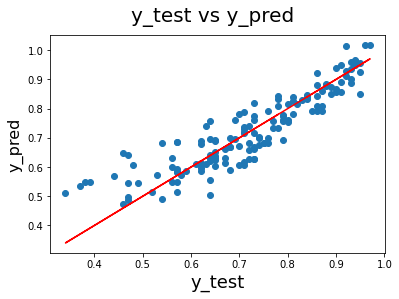

In [398]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.plot(y_test, y_test, color="red")

`Inference:` It seems like the predicted values are really good. Actual scores and predicted scores have almost perfect linearity.

### `Assumption 2: Errors are Normally Distributed:`

<AxesSubplot:xlabel='chance of admit', ylabel='Density'>

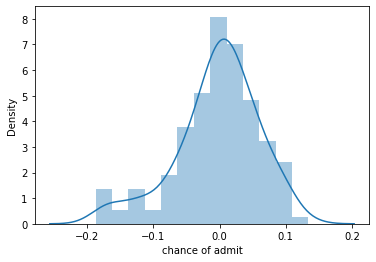

In [399]:
sns.distplot(error_test)

`Inference:` As we can see the distribution is **Normal**, so assumption of Linear Regression is satisfied.

### `Assumption 3: No Multicollinearity among the Features:`

We check the multicolinearity by checking the VIF score of each feature. If the VIF is >5 then there is some dependency of that varaible. And **1 < VIF > 5** means these are the decent features to be considered.

In [400]:
print(vif)

              Features   VIF
2  university rating_5  1.43
1             research  1.27
0                 cgpa  1.26
3              lor_5.0  1.22


`Inference:` All the VIF are below 3 hence these features are independent. **No Multicolinearity** in the above features.

### `Assumption 4: Test of Homoscedasticity:`

Homoscedactcity means the residuals/errors are **eqaul across the Regression Line**. Which means the errors are distributed Normally and there is no multicolinearity among the Features.

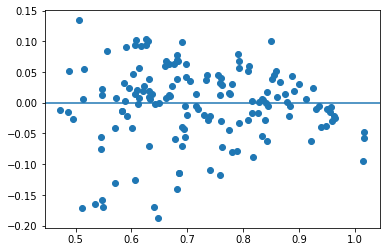

In [401]:
plt.scatter(y_pred_test, error_test)
plt.axhline(0, 0,8)

`Inference:` We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

### `Conclusion of Lasso Model:`

`Following are the variables that are significant in predicting the probabilty of getting admission in IVY League Colleges:`
1. Research
2. CGPA
3. LOR 
4. University Rating 5

We can see that the equation of our best fitted line is:
### <span style="color:red"> *Probability of Admission = 0.107 x **cgpa**  + 0.0413 x **research** + 0.0245 x **university rating_5** + 0.0318 x **lor_0.5** +0.6954* </span>

## `Merging all three Models Evaluation:`

In [402]:
evaluations = [eval_train_OLS , eval_test_OLS, eval_train_Ridge ,eval_test_Ridge, eval_train_Lasso, eval_test_Lasso]


In [403]:
Model_Eval = pd.concat(evaluations, axis = 1)
Model_Eval

,Scores_OLS_train,Scores_OLS_test,Scores_Ridge_train,Scores_Ridge_test,Scores_Lasso_train,Scores_Lasso_test
R-Squared,0.795176,0.810457,0.794500,0.812234,0.795176,0.810457
Mean Absolute Error,0.045232,0.046892,0.045253,0.045979,0.045232,0.046892
Mean Square Error,0.003997,0.003930,0.004010,0.003893,0.003997,0.003930
Root Mean Square Error,0.063221,0.062689,0.063325,0.062394,0.063221,0.062689
Mean Absolute Percentage Error,0.072195,0.075344,0.072414,0.074547,0.072195,0.075344


<span style="color:red"> **Inference**: Lasso Regression and OLS Regression have the same evaluation scores. So we would prefer **Lasso Regression** for our final recommendations. </span>

# <span style="color:green"> Conclusion and Recommendations:

1. Highest positive correlation can be seen between CGPA and Research
    - CGPA and Research are related and have a strong relationship with Chance of Admission. So both these features needs to focused on.


2. Highest Negative correlation between University rating 2 ansd CGPA
    - CGPA is one the most important feature for chance of admission and if university rating 2 is negatively related with it then it means the university rating 2 will have the least chance of admission. So university rating should be good to get the admission in IVY league colleges.


3. Also very good Negative correlation between lor_2.0 and CGPA
    - As mentioned above the importance and relation of CGPA and chance of admission, if letter of recommendation with rating 2 has negative relation then it means the students with low rating on Letter of recommendation have lesser chance of admission. 


4. Good positive relation between lor_5.0 and sop_5.0
    - SOP and LOR show a good relationship, they are correlated. 
    - Hence a student can focus on one SOP or LOR but the rating should be 5 here.


5. All these(GRE, TOEFL,CGPA) three scores show a linear relationship with the Chance of admission.
    - These score has the highest impact on the Chance of Admission


6. Median GRE Score to get the probability of 75% and above is 327


7. Median TOEFL Score to get the probability of 75% and above is 112

    
8. Median CGPA to get the probability of 75% and above is 9.25

### <span style="color:green"> **Final Statement:**
Student with good CGPA score (>9.25), has Research Experience, with University rating: 5, with Letter of Recommendation rating 5 has the highest probability of Admission.

CGPA score, Research Experience, University Rating and Letter of Recommendation rating has a very good and Linear Relationship with Chance of Admission.

<span style="color:green"> As per our model, below is the dependency percentage of features:
- CGPA : 10.7%
- Research Experience : 4.1% 
- University Rating : 2.5% 
- Letter of Recommendation : 3.2%</span>

